In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import os
%matplotlib inline

In [2]:
os.chdir("C:/Users/Elijah/Desktop/results-including-0-scores")
allData = pd.DataFrame()
for filename in os.listdir(os.getcwd()):
    file = pd.read_csv(filename)
    allData = pd.concat([allData, file])

In [3]:
allData

,Unnamed: 0,Unnamed: 0.1,Year,Semester,Quiz #,Student ID,Coding Problem,Score,Maximum,Distance,Percent,Distance Z-score,Distance Min-Max Scaled
0,0,0,2017,fall,quiz06,s159c1ea3,AllCharsExcept,3.0,5,44.719697,0.334183,-0.331719,0.089071
1,1,1,2017,fall,quiz06,s1a2bc1e2,AllCharsExcept,5.0,5,37.507576,0.280288,-0.688284,0.015336
2,2,2,2017,fall,quiz06,s1a748834,AllCharsExcept,5.0,5,37.681818,0.281590,-0.679670,0.017117
3,3,3,2017,fall,quiz06,s204527a1,AllCharsExcept,5.0,5,48.295455,0.360904,-0.154934,0.125629
4,4,4,2017,fall,quiz06,s20ffbd50,AllCharsExcept,5.0,5,133.818182,1.000000,4.073288,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,235,235,2018,fall,quiz11,sf1f60f2f,WriteAndGrade,50.0,50,200.698745,0.335913,-0.738330,0.048055
236,236,236,2018,fall,quiz11,sf39b2f6f,WriteAndGrade,50.0,50,221.213389,0.370248,-0.504492,0.097274
237,237,237,2018,fall,quiz11,sf80872c6,WriteAndGrade,49.0,50,357.129707,0.597734,1.044761,0.423366
238,238,238,2018,fall,quiz11,sfce0219,WriteAndGrade,37.0,50,209.790795,0.351130,-0.634693,0.069868


In [4]:
allData2 = allData.drop(allData.columns[[0,1]], axis=1)

In [5]:
allData2.dtypes

Year                         int64
Semester                    object
Quiz #                      object
Student ID                  object
Coding Problem              object
Score                      float64
Maximum                      int64
Distance                   float64
Percent                    float64
Distance Z-score           float64
Distance Min-Max Scaled    float64
dtype: object

In [6]:
students_mean = allData2.groupby("Student ID").mean()

In [7]:
zscore = students_mean.loc[:, ['Distance Z-score', 'Distance Min-Max Scaled']]

In [8]:
students_sum = allData2.groupby("Student ID").sum()

In [9]:
grades = students_sum.loc[:, ['Score', 'Maximum']]

In [10]:
students = zscore.join(grades)

In [11]:
students["Score / Maximum %"] = students['Score'] / students['Maximum']

In [26]:
students

,Distance Z-score,Distance Min-Max Scaled,Score,Maximum,Score / Maximum %
Student ID,,,,,
s1041b5c9,0.762457,0.348605,51.0,200,0.255000
s1052bd77,0.214526,0.292264,13.0,81,0.160494
s106e6058,-0.055967,0.166713,122.0,164,0.743902
s116f876e,-0.200226,0.157200,263.0,299,0.879599
s1187ca0f,1.748974,0.420951,0.0,50,0.000000
...,...,...,...,...,...
sfeb87ba8,-0.022967,0.179125,105.0,174,0.603448
sfeb9f2b1,-0.346523,0.118333,283.0,294,0.962585
sfefcd29e,-0.372204,0.105349,144.0,254,0.566929


In [12]:
students['Distance Z-score'].corr(students['Score / Maximum %'],method='pearson')

-0.41905908734945946

In [13]:
pearsonr(students['Distance Z-score'], students['Score / Maximum %'])

(-0.4190590873494591, 3.435514071043554e-38)

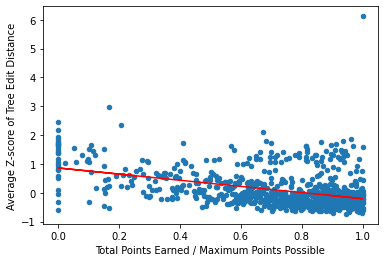

In [14]:
x = students['Score / Maximum %']
y = students['Distance Z-score']
students.plot(x='Score / Maximum %', y='Distance Z-score', kind='scatter')
plt.plot()
m, b = np.polyfit(x, y, 1)
plt.xlabel('Total Points Earned / Maximum Points Possible')
plt.ylabel('Average Z-score of Tree Edit Distance')
plt.plot(x, m*x+b, color='red')
plt.savefig('C:/Users/Elijah/Documents/GitHub/code-to-ast/data-analysis/graphs/all_distance_vs_perf.png')

## Comparing student average Z-score from full point implementations to student's overall performance in quizzes

In [15]:
os.chdir("C:/Users/Elijah/Desktop/results-only-full-scores")
fullScoreData = pd.DataFrame()
for filename in os.listdir(os.getcwd()):
    file = pd.read_csv(filename)
    fullScoreData = pd.concat([fullScoreData, file])

In [16]:
fullScoreData

,Unnamed: 0,Year,Semester,Quiz #,Student ID,Coding Problem,Score,Maximum,Distance,Percent,Distance Z-score,Distance Min-Max Scaled
0,0,2017,fall,quiz06,s1a2bc1e2,AllCharsExcept,5,5,35.053191,0.272878,-0.387510,0.050811
1,1,2017,fall,quiz06,s1a748834,AllCharsExcept,5,5,35.531915,0.276605,-0.364327,0.055676
2,2,2017,fall,quiz06,s204527a1,AllCharsExcept,5,5,40.319149,0.313872,-0.132494,0.104324
3,3,2017,fall,quiz06,s20ffbd50,AllCharsExcept,5,5,128.457447,1.000000,4.135801,1.000000
4,4,2017,fall,quiz06,s2d43f936,AllCharsExcept,5,5,88.053191,0.685466,2.179134,0.589405
...,...,...,...,...,...,...,...,...,...,...,...,...
103,103,2018,fall,quiz11,seb2c407c,WriteAndGrade,50,50,270.803738,0.698554,1.649165,0.566781
104,104,2018,fall,quiz11,see34afd4,WriteAndGrade,50,50,202.766355,0.523047,0.510975,0.314555
105,105,2018,fall,quiz11,sf0118345,WriteAndGrade,50,50,138.186916,0.356461,-0.569367,0.075148
106,106,2018,fall,quiz11,sf1f60f2f,WriteAndGrade,50,50,141.177570,0.364176,-0.519337,0.086235


In [17]:
fullScoreData2 = fullScoreData.drop(fullScoreData.columns[0], axis=1)

In [18]:
f_students_mean = fullScoreData2.groupby("Student ID").mean()

In [19]:
f_zscore = f_students_mean.loc[:, ['Distance Z-score']]

In [20]:
f_zscore.rename({'Distance Z-score': 'Z-score of 100% Submissions'}, axis=1, inplace=True)

In [21]:
f_students = students.join(f_zscore)

In [22]:
f_students_final = f_students.dropna(subset=['Z-score of 100% Submissions'])

In [23]:
f_students_final

,Distance Z-score,Distance Min-Max Scaled,Score,Maximum,Score / Maximum %,Z-score of 100% Submissions
Student ID,,,,,,
s1041b5c9,0.762457,0.348605,51.0,200,0.255000,0.422196
s1052bd77,0.214526,0.292264,13.0,81,0.160494,-0.771563
s106e6058,-0.055967,0.166713,122.0,164,0.743902,0.040294
s116f876e,-0.200226,0.157200,263.0,299,0.879599,-0.044687
s121e58a1,-0.226883,0.143856,299.0,299,1.000000,-0.153839
...,...,...,...,...,...,...
sfeb87ba8,-0.022967,0.179125,105.0,174,0.603448,-0.196327
sfeb9f2b1,-0.346523,0.118333,283.0,294,0.962585,-0.317479
sfefcd29e,-0.372204,0.105349,144.0,254,0.566929,-0.554266


In [24]:
pearsonr(f_students_final['Z-score of 100% Submissions'], f_students_final['Score / Maximum %'])

(-0.11126124786149652, 0.001446394537042609)

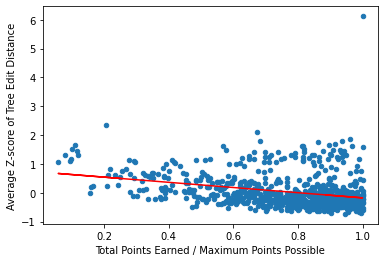

In [25]:
x = f_students_final['Score / Maximum %']
y = f_students_final['Distance Z-score']
f_students_final.plot(x='Score / Maximum %', y='Distance Z-score', kind='scatter')
plt.plot()
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='red')
plt.xlabel('Total Points Earned / Maximum Points Possible')
plt.ylabel('Average Z-score of Tree Edit Distance')
plt.savefig('C:/Users/Elijah/Documents/GitHub/code-to-ast/data-analysis/graphs/full_score_distance_vs_perf.png')